In [1]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

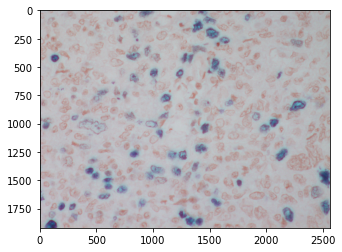

In [2]:
img1=cv2.imread("1714 KI67.jpg")
plt.imshow(img1)

In [3]:
hist_c,bins_c = np.histogram(img1.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [4]:
image_yuv = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)

# Applying Histogram Equalization on the original imageof the Y channel
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the YUV image back to RGB format
image_c_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Generating the histogram of the equalized image
hist_c_equalized, bins_c_equalized = np.histogram(image_c_equalized.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c_equalized = hist_c_equalized.cumsum()
cdf_c_equalized_normalized = cdf_c_equalized * hist_c_equalized.max()/ cdf_c_equalized.max()

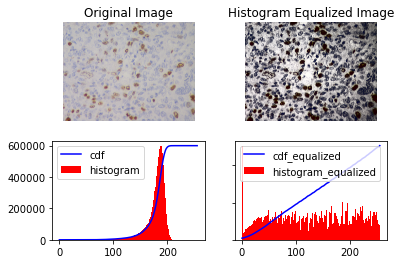

In [5]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(img1.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_equalized_normalized, color = 'b')
axs[1, 1].hist(image_c_equalized.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

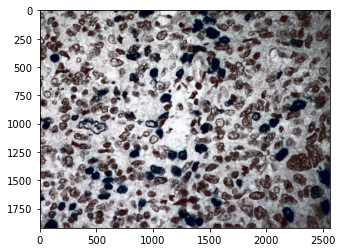

In [6]:
plt.imshow(image_c_equalized)

In [7]:
save_img=cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB)
cv2.imwrite("1714_contrast.jpg",save_img)

True

In [8]:
blur = cv2.GaussianBlur(image_c_equalized,(13,13),0)

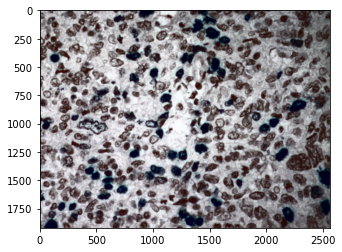

In [9]:
plt.imshow(blur)

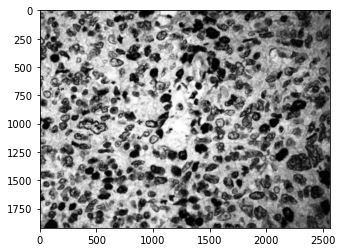

In [10]:
gray1=cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1,'gray')

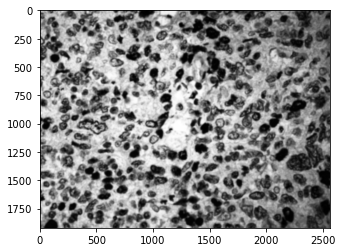

In [11]:
blur = cv2.GaussianBlur(gray1,(21,21),0)
plt.imshow(blur,'gray')

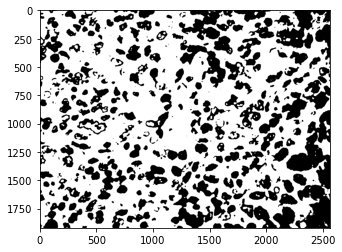

In [12]:
threshold,binary2=cv2.threshold(blur,100,255,cv2.THRESH_BINARY)
plt.imshow(binary2,'gray')

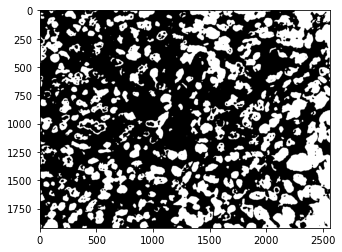

In [13]:
binary=binary2-255
plt.imshow(binary,'gray')

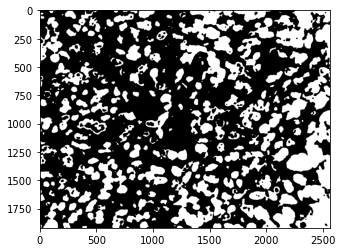

In [14]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=4)
plt.imshow(closed,'gray')

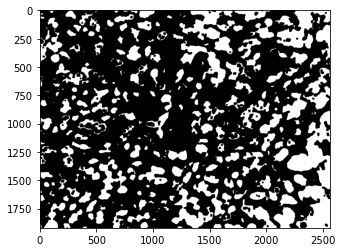

In [15]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(closed, kernel, iterations=5)
plt.imshow(erosion,'gray')

In [16]:
contour2, hierarchy = cv2.findContours(image=erosion.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [17]:
contour_all=len(contour2)
len(contour2)

360

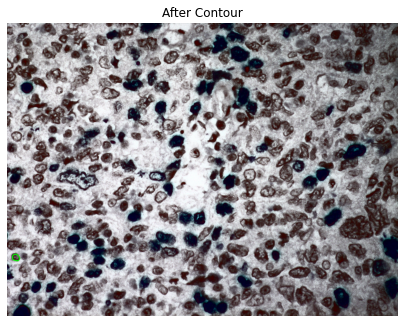

In [18]:
cv2.drawContours(image=image_c_equalized,contours=contour2,contourIdx=60, color=(0,255,0), thickness=5)
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(image_c_equalized, cmap="gray"), plt.axis("off");

In [19]:
cells=0
for i in range(len(contour2)):
    cv2.drawContours(image=image_c_equalized,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>300):
        if(area>3500):
            cells=cells+(area//3500)
        else:
            cells=cells+1 

74.5 0
334.0 1
448.5 2
0.0 3
340.0 4
2042.0 5
4293.5 6
2652.5 7
73.5 8
1843.5 9
2667.0 10
2.0 11
351.5 12
494.5 13
223.5 14
24.5 15
365.5 16
7392.5 17
34.5 18
9329.5 19
6562.5 20
0.0 21
81.0 22
21701.5 23
706.5 24
4182.5 25
9007.0 26
0.0 27
435.0 28
149.5 29
13.5 30
2688.0 31
15386.5 32
132.0 33
70.0 34
1095.0 35
4718.5 36
4169.0 37
25932.0 38
1376.0 39
1579.5 40
1522.5 41
53.5 42
9647.5 43
4470.5 44
1705.5 45
5948.0 46
41.5 47
687.0 48
1092.0 49
326.5 50
3109.5 51
0.0 52
198.5 53
15.0 54
5269.5 55
12687.0 56
5.0 57
470.5 58
630.0 59
1541.5 60
70365.0 61
21.0 62
180.5 63
6461.5 64
1498.5 65
2491.5 66
3012.0 67
4111.0 68
0.0 69
488.0 70
291.5 71
29.5 72
7473.5 73
5925.5 74
923.0 75
7802.0 76
825.5 77
106.0 78
4355.0 79
4317.0 80
2833.0 81
14.0 82
6.0 83
32.5 84
3735.0 85
157.0 86
5910.0 87
8570.0 88
19394.0 89
195.5 90
0.0 91
0.0 92
81.5 93
339.0 94
3987.0 95
3434.0 96
566.5 97
2603.5 98
9.0 99
34496.0 100
20.0 101
2817.0 102
2.0 103
42.0 104
18.0 105
198.0 106
2410.5 107
0.0 108
120.0 

In [20]:
cells


427.0

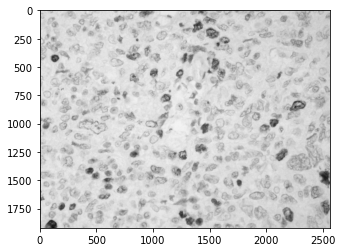

In [21]:
gray_org=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_org,'gray')

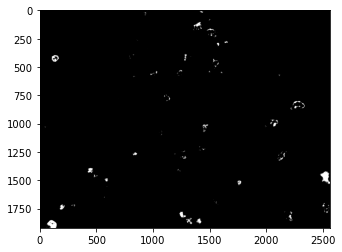

In [22]:
thresh, binary = cv2.threshold(gray_org, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(binary,'binary')

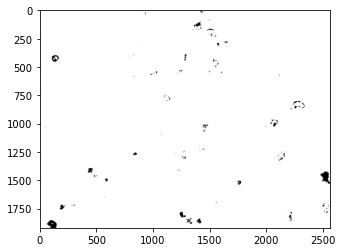

In [23]:
binary=binary-255
plt.imshow(binary,'binary')

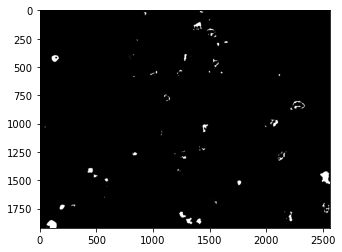

In [24]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=5)
plt.imshow(closed,'gray')

In [25]:
contour2, hierarchy = cv2.findContours(image=closed.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [26]:
contour_brown=len(contour2)
len(contour2)

106

9.0 0
4342.0 1
1265.5 2
18.5 3
1678.5 4
1596.5 5
1285.5 6
17.5 7
0.0 8
0.0 9
619.0 10
1325.5 11
248.0 12
0.5 13
351.5 14
177.0 15
0.0 16
1.0 17
0.0 18
0.0 19
18.0 20
4.5 21
976.5 22
526.5 23
478.0 24
5562.0 25
21.5 26
116.5 27
1466.5 28
512.0 29
0.0 30
41.5 31
37.5 32
901.5 33
695.5 34
0.0 35
87.0 36
20.5 37
67.0 38
51.5 39
213.0 40
29.0 41
0.0 42
0.0 43
73.5 44
0.0 45
0.0 46
31.0 47
74.5 48
0.0 49
1478.0 50
1633.0 51
185.5 52
0.0 53
595.0 54
366.0 55
661.0 56
68.0 57
0.0 58
215.0 59
0.0 60
185.0 61
59.0 62
13.5 63
0.0 64
3.0 65
136.5 66
67.5 67
215.0 68
146.0 69
198.0 70
114.5 71
223.5 72
4.0 73
0.0 74
0.0 75
1.0 76
394.5 77
352.0 78
9.5 79
0.0 80
3.0 81
10.0 82
2718.5 83
34.5 84
854.0 85
0.0 86
367.5 87
333.0 88
39.5 89
160.0 90
23.0 91
0.0 92
384.0 93
0.0 94
16.5 95
48.0 96
96.5 97
466.0 98
1729.0 99
52.5 100
264.0 101
0.0 102
255.5 103
0.0 104
6.0 105


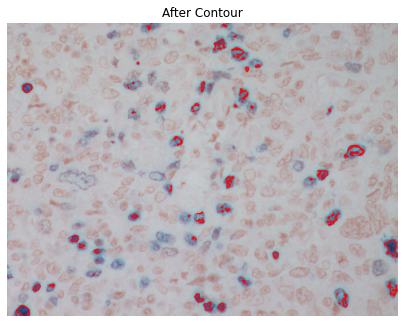

In [27]:
cells_brown=0
for i in range(len(contour2)):
    cv2.drawContours(image=img1,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>1):
        cells_brown=cells_brown+1
    
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(img1, cmap="gray"), plt.axis("off");

In [28]:
cells_brown

79

In [29]:
percent_positivity_1=(cells_brown/cells)*100
percent_positivity_1


18.501170960187356

In [30]:
#manualcount_blue=295
#manualcount_brown=47

actual_percent_positivity=(71/361)*100
actual_percent_positivity


19.667590027700832

In [31]:
error_rate = abs((actual_percent_positivity-percent_positivity_1))/actual_percent_positivity
error_rate=error_rate*100
error_rate

5.930665962991058

In [32]:
accuracy=100-(error_rate)
accuracy

94.06933403700894

In [33]:
#without area manipulations

percent_positivity=(contour_brown/contour_all)*100
percent_positivity


29.444444444444446

In [34]:
error_rate = abs(actual_percent_positivity-percent_positivity)/actual_percent_positivity
error_rate=error_rate*100
error_rate

49.71048513302034

In [35]:
accuracy=100-(error_rate)
accuracy

50.28951486697966